In [1]:
import os
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from textblob import TextBlob
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
import string 
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud

**Loading and Concatenating Dataset**

In [2]:
dataframes = []

def extract_mg(title):
    match = re.search(r'\b\d+(?:\.\d+)?mg\b', title.lower())
    return match.group(0) if match else None

folder_path = 'Project'
for file in os.listdir(folder_path):    
    if file.endswith(".xlsx"):
        file_path = os.path.join(folder_path, file)
        df = pd.read_excel(file_path)      
        df['Melatonin_MG'] = df['ProductTitle'].apply(extract_mg)
        dataframes.append(df)
final_df = pd.concat(dataframes, ignore_index=True)
extracted_mg_count = final_df['Melatonin_MG'].notnull().sum()
extracted_mg_value = final_df['Melatonin_MG'].unique()
print(f"Rows with extracted Melatonin MG: {extracted_mg_count}")

Rows with extracted Melatonin MG: 29511


In [3]:
final_df.shape

(29511, 15)

In [4]:
columns_to_drop = ['ASIN', 'HelpfulCounts', 'Images', 'PageUrl', 'ParentId', 'ProductLink', 'Reviewer', 'Verified','ReviewTitle']

final_df = final_df.drop(columns=columns_to_drop)
final_df

,Brand,ProductTitle,ReviewContent,ReviewDate,ReviewScore,Melatonin_MG
0,JoySpring,JoySpring Melatonin 1MG for Kids | 5HTP for Ki...,"Being a mom of a 4 1/2 and two-year-old, I’ve ...","October 6, 2024",5.0,1mg
1,JoySpring,JoySpring Melatonin 1MG for Kids | 5HTP for Ki...,"I want to start by saying, I read the good rev...","May 10, 2024",5.0,1mg
2,JoySpring,JoySpring Melatonin 1MG for Kids | 5HTP for Ki...,My child loves the taste and it helps her sleep.,"September 16, 2024",5.0,1mg
3,JoySpring,JoySpring Melatonin 1MG for Kids | 5HTP for Ki...,I have been getting this product for years for...,"October 19, 2024",4.0,1mg
4,JoySpring,JoySpring Melatonin 1MG for Kids | 5HTP for Ki...,My 2 year old always had a problem going to be...,"August 7, 2024",5.0,1mg
...,...,...,...,...,...,...
29506,Zarbee's,Zarbee's Kids Sleep Supplement Liquid with 1mg...,Made my 2 year old angry and miserable. And i...,"May 28, 2024",2.0,1mg
29507,Zarbee's,Zarbee's Kids Sleep Supplement Liquid with 1mg...,I purchased this for a long lasting sleep for ...,"April 24, 2024",2.0,1mg
29508,Zarbee's,Zarbee's Kids Sleep Supplement Liquid with 1mg...,Never going to buy this product again in life....,"April 23, 2024",1.0,1mg
29509,Zarbee's,Zarbee's Kids Sleep Supplement Liquid with 1mg...,It makes it worse. Don't buy it.,"January 22, 2024",1.0,1mg


In [5]:
def extract_form(title):
    title_lower = title.lower()
    if 'gummy' in title_lower:
        return 'Gummy'
    elif 'gummies' in title_lower:
        return 'Gummy'
    elif 'tablet' in title_lower:
        return 'Tablet'
    elif 'liquid' in title_lower:
        return 'Liquid'
    else:
        return 'Other'

final_df['Form'] = final_df['ProductTitle'].apply(extract_form)
final_df

,Brand,ProductTitle,ReviewContent,ReviewDate,ReviewScore,Melatonin_MG,Form
0,JoySpring,JoySpring Melatonin 1MG for Kids | 5HTP for Ki...,"Being a mom of a 4 1/2 and two-year-old, I’ve ...","October 6, 2024",5.0,1mg,Liquid
1,JoySpring,JoySpring Melatonin 1MG for Kids | 5HTP for Ki...,"I want to start by saying, I read the good rev...","May 10, 2024",5.0,1mg,Liquid
2,JoySpring,JoySpring Melatonin 1MG for Kids | 5HTP for Ki...,My child loves the taste and it helps her sleep.,"September 16, 2024",5.0,1mg,Liquid
3,JoySpring,JoySpring Melatonin 1MG for Kids | 5HTP for Ki...,I have been getting this product for years for...,"October 19, 2024",4.0,1mg,Liquid
4,JoySpring,JoySpring Melatonin 1MG for Kids | 5HTP for Ki...,My 2 year old always had a problem going to be...,"August 7, 2024",5.0,1mg,Liquid
...,...,...,...,...,...,...,...
29506,Zarbee's,Zarbee's Kids Sleep Supplement Liquid with 1mg...,Made my 2 year old angry and miserable. And i...,"May 28, 2024",2.0,1mg,Liquid
29507,Zarbee's,Zarbee's Kids Sleep Supplement Liquid with 1mg...,I purchased this for a long lasting sleep for ...,"April 24, 2024",2.0,1mg,Liquid
29508,Zarbee's,Zarbee's Kids Sleep Supplement Liquid with 1mg...,Never going to buy this product again in life....,"April 23, 2024",1.0,1mg,Liquid
29509,Zarbee's,Zarbee's Kids Sleep Supplement Liquid with 1mg...,It makes it worse. Don't buy it.,"January 22, 2024",1.0,1mg,Liquid


## Analyze and Visualize Variables

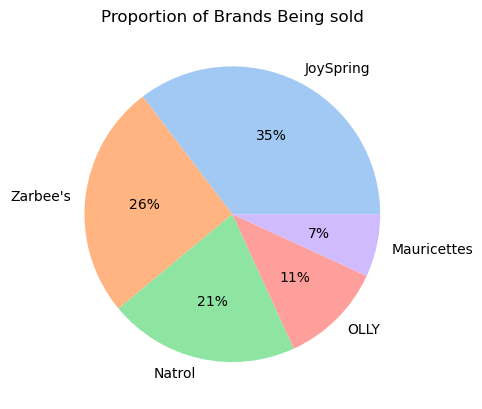

In [6]:
data = final_df["Brand"].value_counts(normalize=True)

labels = ["JoySpring","Zarbee's","Natrol","OLLY","Mauricettes"]

colors = sns.color_palette('pastel')

plt.pie(data,labels=labels,colors=colors, autopct='%.0f%%')
plt.title("Proportion of Brands Being sold");

In [7]:
#Display number missing values per column
final_df.isna().sum()

Brand              0
ProductTitle       0
ReviewContent    298
ReviewDate         0
ReviewScore        0
Melatonin_MG       0
Form               0
dtype: int64

In [8]:
final_df = final_df.dropna()

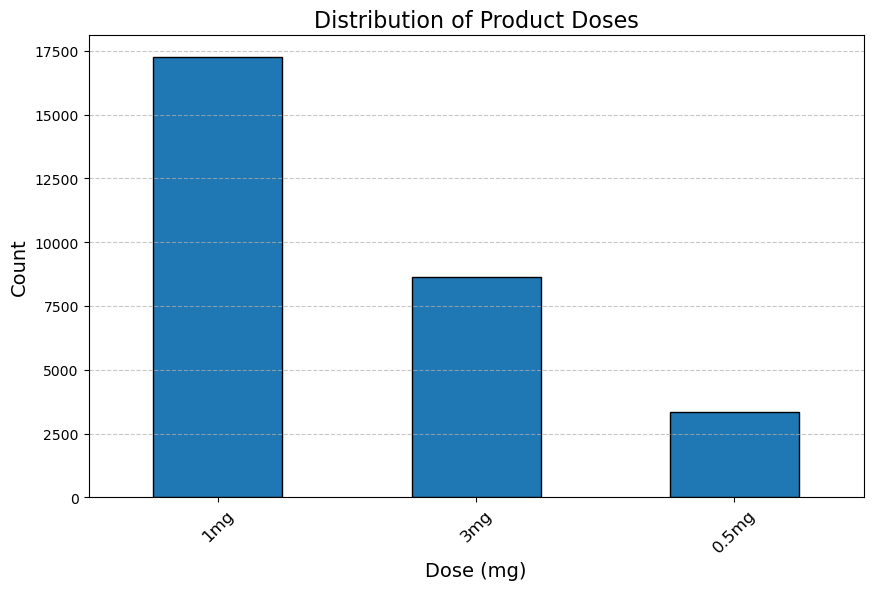

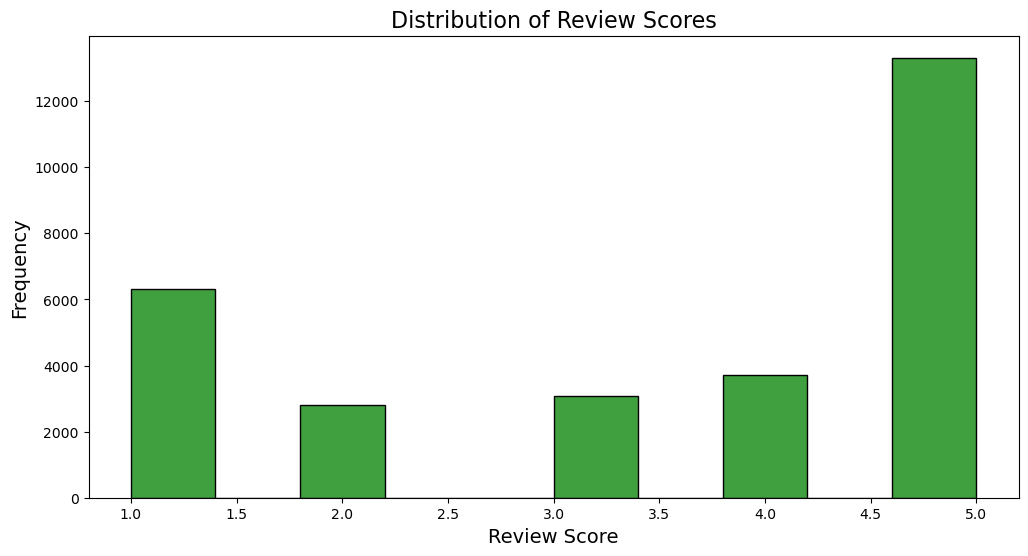

In [9]:
# Univariate Analysis: Melatonin Dosage Distribution 
dose_counts = final_df['Melatonin_MG'].value_counts()
plt.figure(figsize=(10, 6))
dose_counts.plot(kind='bar', edgecolor='black')
plt.title('Distribution of Product Doses', fontsize=16)
plt.xlabel('Dose (mg)', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


# Univariate Analysis: Review Score Distribution 
plt.figure(figsize=(12, 6))
sns.histplot(final_df['ReviewScore'], bins=10, kde=False, color='green')
plt.title('Distribution of Review Scores', fontsize=16)
plt.xlabel('Review Score', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()

In [10]:
final_df['ReviewDate'] = pd.to_datetime(final_df['ReviewDate'], errors='coerce')
final_df.head()

C:\Users\starb\AppData\Local\Temp\ipykernel_12832\385834496.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['ReviewDate'] = pd.to_datetime(final_df['ReviewDate'], errors='coerce')


,Brand,ProductTitle,ReviewContent,ReviewDate,ReviewScore,Melatonin_MG,Form
0,JoySpring,JoySpring Melatonin 1MG for Kids | 5HTP for Ki...,"Being a mom of a 4 1/2 and two-year-old, I’ve ...",2024-10-06,5.0,1mg,Liquid
1,JoySpring,JoySpring Melatonin 1MG for Kids | 5HTP for Ki...,"I want to start by saying, I read the good rev...",2024-05-10,5.0,1mg,Liquid
2,JoySpring,JoySpring Melatonin 1MG for Kids | 5HTP for Ki...,My child loves the taste and it helps her sleep.,2024-09-16,5.0,1mg,Liquid
3,JoySpring,JoySpring Melatonin 1MG for Kids | 5HTP for Ki...,I have been getting this product for years for...,2024-10-19,4.0,1mg,Liquid
4,JoySpring,JoySpring Melatonin 1MG for Kids | 5HTP for Ki...,My 2 year old always had a problem going to be...,2024-08-07,5.0,1mg,Liquid


C:\Users\starb\AppData\Local\Temp\ipykernel_12832\566989445.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['Year'] = final_df['ReviewDate'].dt.to_period('Y')


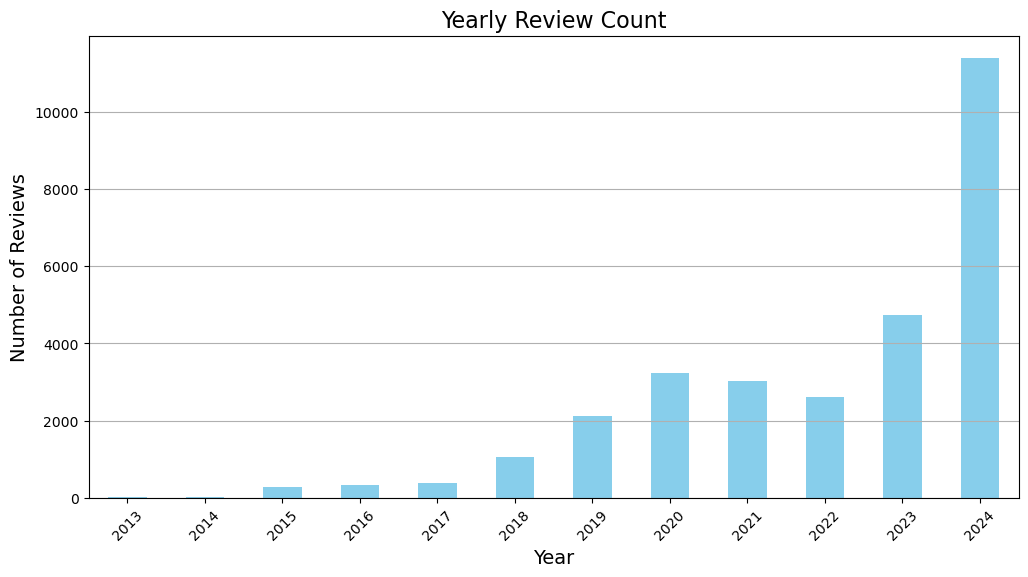

In [11]:
# Visualize: Reviews Grouped by Month-Year
final_df['Year'] = final_df['ReviewDate'].dt.to_period('Y')
monthly_reviews = final_df.groupby('Year').size()

plt.figure(figsize=(12, 6))
monthly_reviews.plot(kind='bar', color='skyblue')
plt.title('Yearly Review Count', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Reviews', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

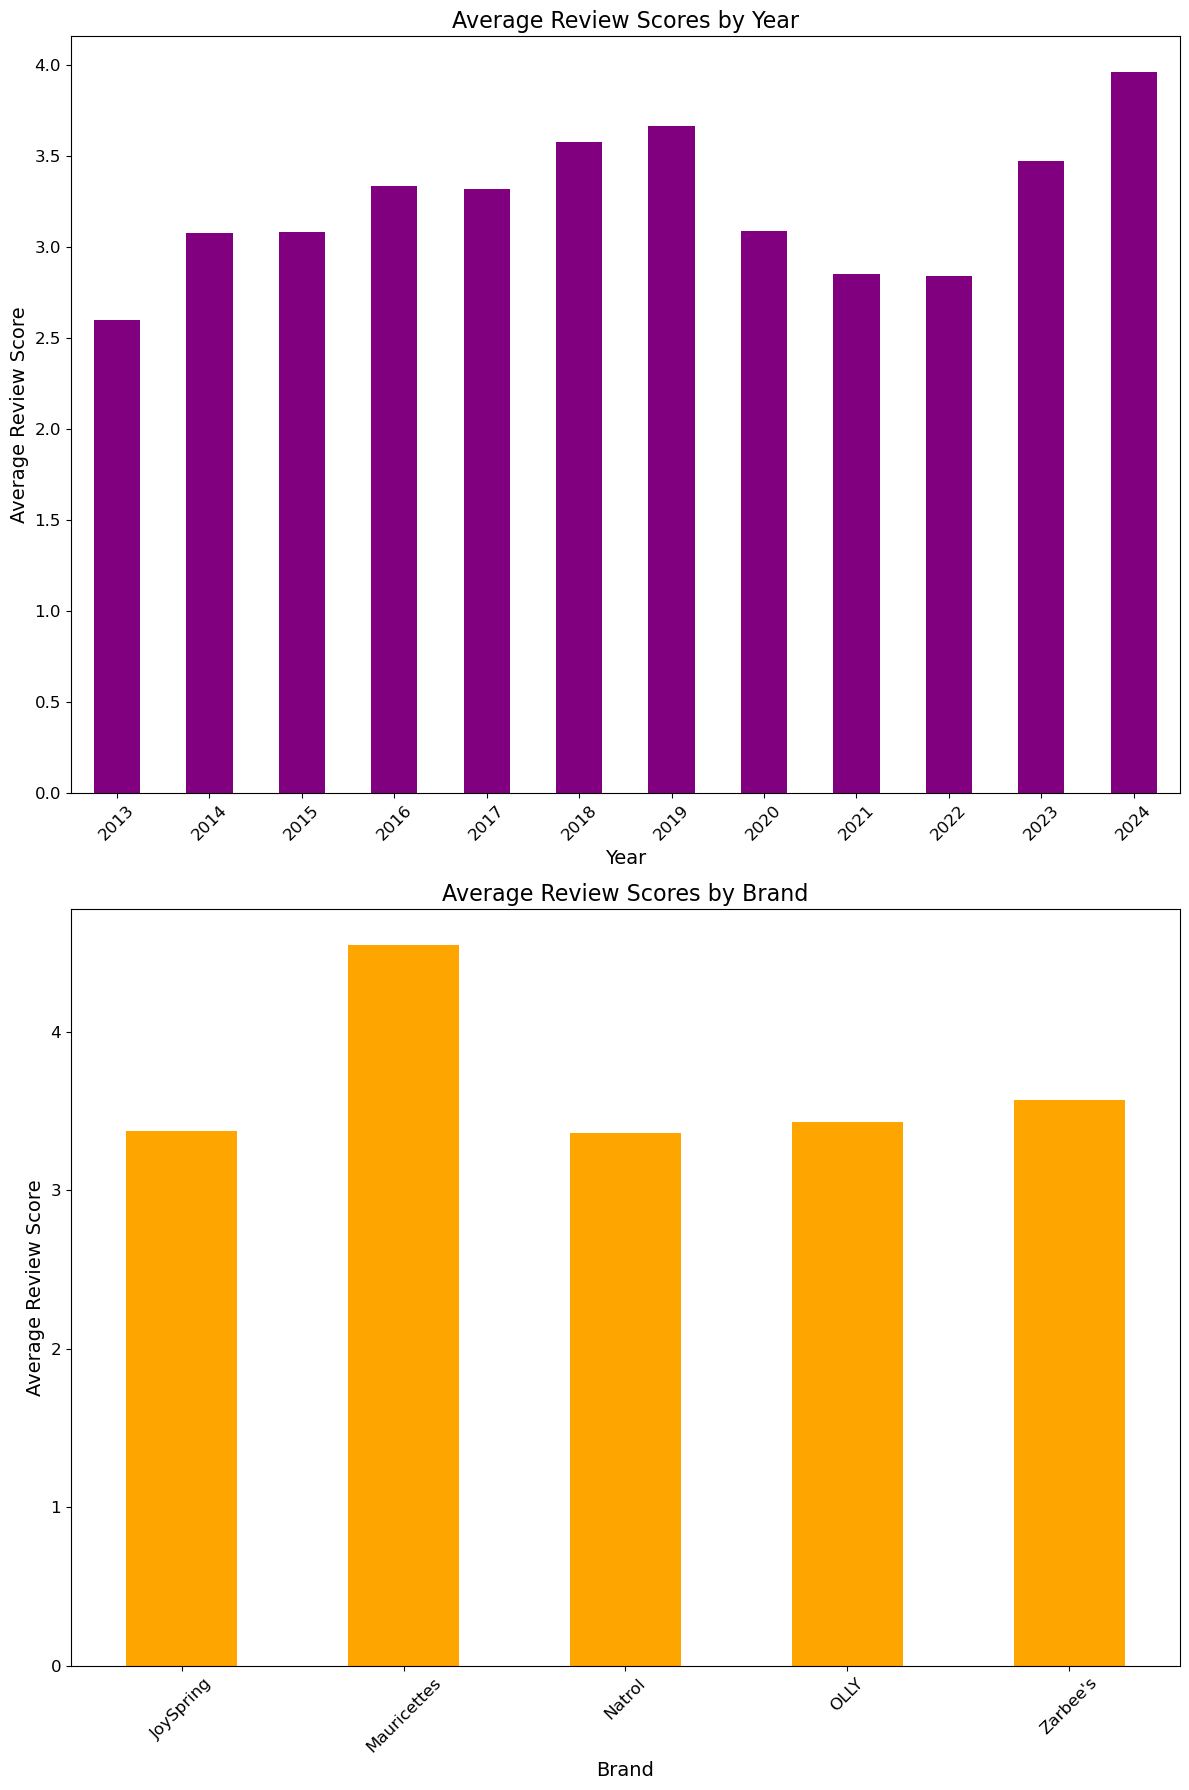

In [12]:
fig, axarr = plt.subplots(2, 1, figsize=(12, 18))

# Plot 1: Average Review Scores by Year
final_df.groupby(final_df['Year'])['ReviewScore'].mean().plot.bar(ax=axarr[0], fontsize=12, color='purple')
axarr[0].set_title('Average Review Scores by Year', fontsize=16)
axarr[0].set_xlabel('Year', fontsize=14)
axarr[0].set_ylabel('Average Review Score', fontsize=14)
axarr[0].tick_params(axis='x', rotation=45) 

# Plot 2: Average Review Scores by Brand
final_df.groupby('Brand')['ReviewScore'].mean().plot.bar(ax=axarr[1], fontsize=12, color='orange')
axarr[1].set_title('Average Review Scores by Brand', fontsize=16)
axarr[1].set_xlabel('Brand', fontsize=14)
axarr[1].set_ylabel('Average Review Score', fontsize=14)
axarr[1].tick_params(axis='x', rotation=45) 

plt.tight_layout()

plt.show()

C:\Users\starb\AppData\Local\Temp\ipykernel_12832\432661490.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['YearMonth'] = final_df['ReviewDate'].dt.to_period('M')


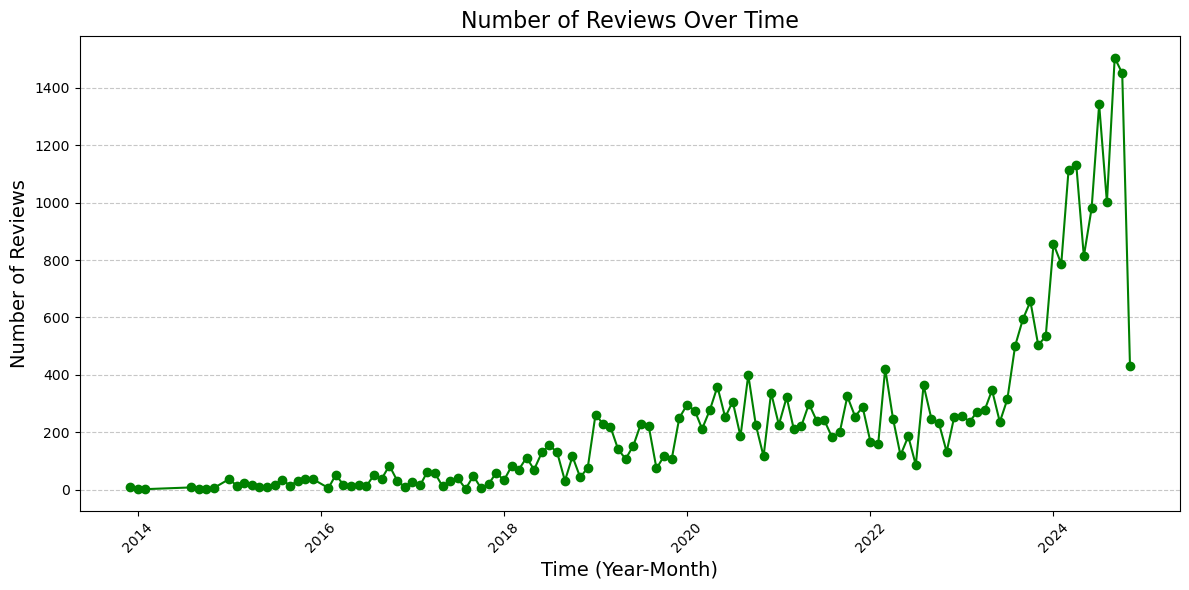

In [13]:
final_df['YearMonth'] = final_df['ReviewDate'].dt.to_period('M')
# Group by Year-Month and count reviews
review_trend = final_df.groupby('YearMonth').size().reset_index(name='ReviewCount')

# Convert 'YearMonth' to datetime for proper plotting
review_trend['YearMonth'] = review_trend['YearMonth'].astype(str)
review_trend['YearMonth'] = pd.to_datetime(review_trend['YearMonth'])

# Plot number of reviews over time
plt.figure(figsize=(12, 6))
plt.plot(review_trend['YearMonth'], review_trend['ReviewCount'], marker='o', linestyle='-', color='green')
plt.title('Number of Reviews Over Time', fontsize=16)
plt.xlabel('Time (Year-Month)', fontsize=14)
plt.ylabel('Number of Reviews', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

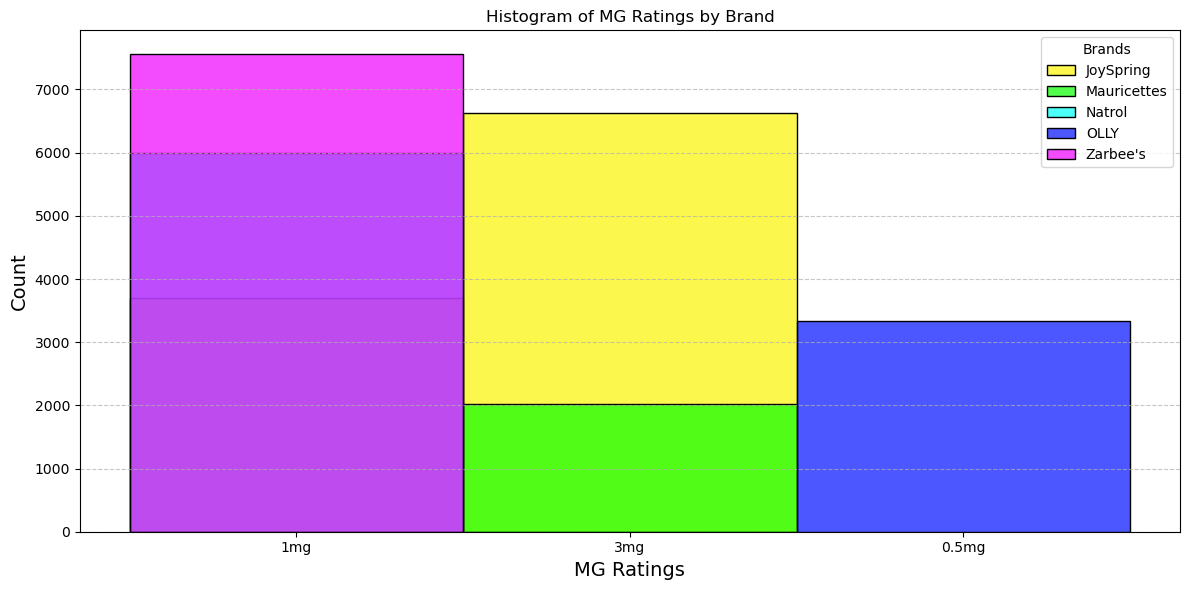

In [14]:
brands = final_df['Brand'].unique()
mg_data = final_df[['Brand', 'Melatonin_MG']].dropna()

colors = sns.color_palette("hsv", len(brands)) 

plt.figure(figsize=(12, 6))

for i, brand in enumerate(brands):
    brand_data = mg_data[mg_data['Brand'] == brand]['Melatonin_MG']
    sns.histplot(brand_data, kde=False, label=brand, bins=len(brand_data.unique()), alpha=0.7,color=colors[i])

plt.title('Histogram of MG Ratings by Brand')
plt.xlabel('MG Ratings',fontsize=14)
plt.ylabel('Count',fontsize=14)
plt.legend(title='Brands', loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

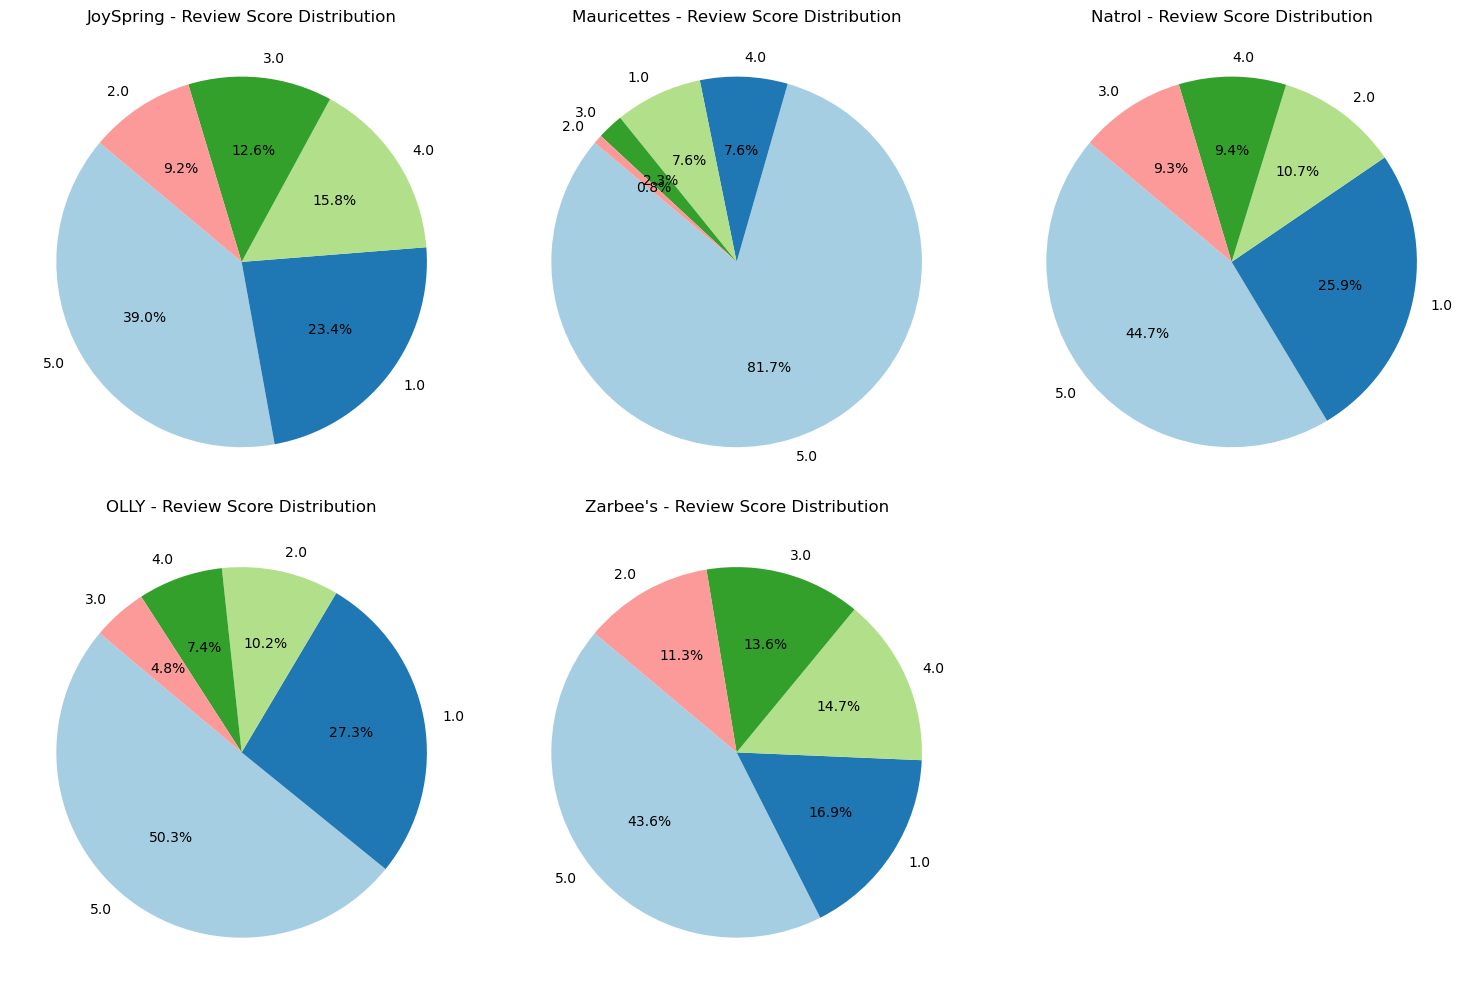

In [15]:
filtered_data = final_df.dropna(subset=['Brand', 'ReviewScore'])

brands = filtered_data['Brand'].unique()

n_brands = len(brands)
cols = 3 
rows = (n_brands // cols) + (n_brands % cols > 0) 

fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 5))
axes = axes.flatten() 

for i, brand in enumerate(brands):
    brand_data = filtered_data[filtered_data['Brand'] == brand]
    review_counts = brand_data['ReviewScore'].value_counts()
    axes[i].pie(review_counts,labels=review_counts.index,autopct='%1.1f%%',startangle=140,
        colors=plt.cm.Paired(range(len(review_counts))),)
    axes[i].set_title(f"{brand} - Review Score Distribution", fontsize=12)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])
plt.tight_layout()
plt.show()


## Perform NLP Data cleaning

In [16]:
reviewContent = final_df.copy()
reviewContent

,Brand,ProductTitle,ReviewContent,ReviewDate,ReviewScore,Melatonin_MG,Form,Year,YearMonth
0,JoySpring,JoySpring Melatonin 1MG for Kids | 5HTP for Ki...,"Being a mom of a 4 1/2 and two-year-old, I’ve ...",2024-10-06,5.0,1mg,Liquid,2024,2024-10
1,JoySpring,JoySpring Melatonin 1MG for Kids | 5HTP for Ki...,"I want to start by saying, I read the good rev...",2024-05-10,5.0,1mg,Liquid,2024,2024-05
2,JoySpring,JoySpring Melatonin 1MG for Kids | 5HTP for Ki...,My child loves the taste and it helps her sleep.,2024-09-16,5.0,1mg,Liquid,2024,2024-09
3,JoySpring,JoySpring Melatonin 1MG for Kids | 5HTP for Ki...,I have been getting this product for years for...,2024-10-19,4.0,1mg,Liquid,2024,2024-10
4,JoySpring,JoySpring Melatonin 1MG for Kids | 5HTP for Ki...,My 2 year old always had a problem going to be...,2024-08-07,5.0,1mg,Liquid,2024,2024-08
...,...,...,...,...,...,...,...,...,...
29506,Zarbee's,Zarbee's Kids Sleep Supplement Liquid with 1mg...,Made my 2 year old angry and miserable. And i...,2024-05-28,2.0,1mg,Liquid,2024,2024-05
29507,Zarbee's,Zarbee's Kids Sleep Supplement Liquid with 1mg...,I purchased this for a long lasting sleep for ...,2024-04-24,2.0,1mg,Liquid,2024,2024-04
29508,Zarbee's,Zarbee's Kids Sleep Supplement Liquid with 1mg...,Never going to buy this product again in life....,2024-04-23,1.0,1mg,Liquid,2024,2024-04
29509,Zarbee's,Zarbee's Kids Sleep Supplement Liquid with 1mg...,It makes it worse. Don't buy it.,2024-01-22,1.0,1mg,Liquid,2024,2024-01


In [17]:
def clean_text(text):
    text = re.sub(r'@[A-Z_a-z_0-9_]+', '', text)
    text = re.sub(r'https?:\/\/\S+', '', text)
    text = re.sub(r'#', '', text)     
    text = text.lower()
    return text

In [18]:
reviewContent['ReviewContent'] = reviewContent['ReviewContent'].fillna("").apply(clean_text)
reviewContent['ReviewContent']

0        being a mom of a 4 1/2 and two-year-old, i’ve ...
1        i want to start by saying, i read the good rev...
2         my child loves the taste and it helps her sleep.
3        i have been getting this product for years for...
4        my 2 year old always had a problem going to be...
                               ...                        
29506    made my 2 year old angry and miserable.  and i...
29507    i purchased this for a long lasting sleep for ...
29508    never going to buy this product again in life....
29509                     it makes it worse. don't buy it.
29510    i was talking to my toddlers doctor about his ...
Name: ReviewContent, Length: 29213, dtype: object

In [19]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\starb\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [20]:
raw_freq = pd.Series(' '.join(reviewContent['ReviewContent']).split()).value_counts()[:20]
raw_freq

the      49085
and      45431
to       42029
i        40453
a        32163
it       28210
my       24413
for      22461
this     22007
is       18323
of       16031
but      13259
in       12542
sleep    11731
not      11625
was      11196
they     11195
he       10464
have     10255
we       10079
Name: count, dtype: int64

In [21]:
stop = pd.read_csv('stop.txt', encoding = "ISO-8859-1")
stop.tail()


,x
568,yours
569,yourself
570,yourselves
571,z
572,zero


In [22]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
import string


In [23]:
data = final_df
# Initialize lemmatizer and stemmer
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()
custom_stopwords = set(stopwords.words('english')).union({"package", "product", "item"})

def clean_text(text):
    if pd.isnull(text):
        return ""
    #Lowercase
    text = text.lower()
    #punctuation
    text = text.translate(str.maketrans("", "", string.punctuation))
    # Tokenize text
    tokens = word_tokenize(text)
    #print(tokens)
    # Remove stopwords
    tokens = [word for word in tokens if word not in custom_stopwords]
    tokens = [word for word in tokens if not word.isdigit()]
    # Lemmatize tokens
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return " ".join(tokens)
# Apply cleaning
if 'ReviewContent' in data.columns:
    final_df['CleanReview'] = data['ReviewContent'].apply(clean_text)
# Handle missing values by filling with an empty string
data.fillna("", inplace=True)


C:\Users\starb\AppData\Local\Temp\ipykernel_12832\752420511.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['CleanReview'] = data['ReviewContent'].apply(clean_text)
C:\Users\starb\AppData\Local\Temp\ipykernel_12832\752420511.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.fillna("", inplace=True)


In [24]:
#Form N Grams
cvect = CountVectorizer(min_df = 1, max_df = 0.9)
X = cvect.fit_transform(final_df['CleanReview'])
word_freq_df = pd.DataFrame({'term': cvect.get_feature_names_out(), 
                             'occurrences':np.asarray(X.sum(axis=0)).ravel().tolist()})
word_freq_df['frequency'] = word_freq_df['occurrences']/np.sum(word_freq_df['occurrences'])

In [25]:
word_freq_df

,term,occurrences,frequency
0,04042018initially,10,0.000014
1,05mg,108,0.000150
2,05mg1mg,23,0.000032
3,05ml,24,0.000033
4,062024i,16,0.000022
...,...,...,...
5220,zzzzzzmy,8,0.000011
5221,éste,248,0.000344
5222,المنتج,6,0.000008
5223,ذايب,6,0.000008


In [26]:
word_freq_df.sort_values('occurrences', ascending = False).head()

,term,occurrences,frequency
4121,sleep,16578,0.022962
3041,night,12773,0.017692
5126,work,9608,0.013308
2506,kid,8570,0.011870
460,asleep,8365,0.011586


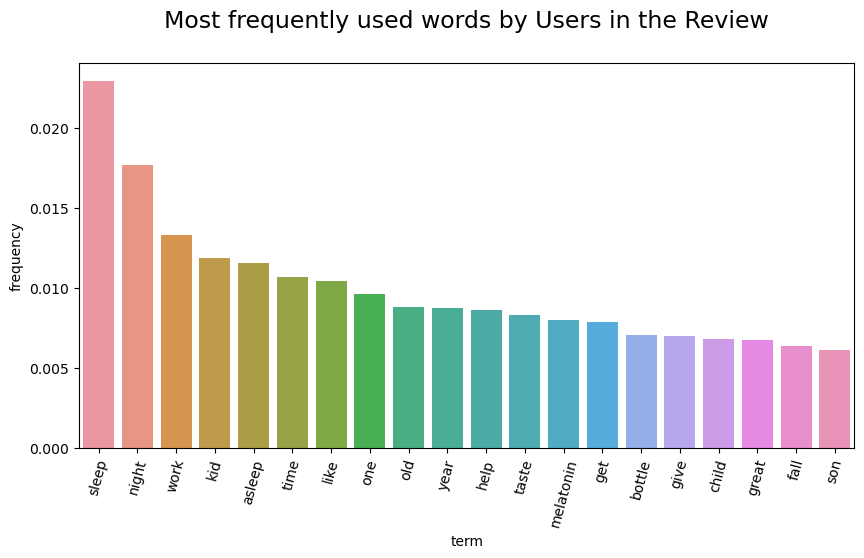

In [27]:
fig = plt.figure(figsize = (10, 5))
plot=sns.barplot(x="term",y="frequency", data= word_freq_df.sort_values('frequency', ascending = False)[0:20])
plot.set_xticks(range(0, 20))
plot.set_xticklabels(rotation=75, labels = word_freq_df.sort_values('frequency', ascending=False).term[0:20])
plt.title("Most frequently used words by Users in the Review", y = 1.07, fontsize = 17);
plt.show()

In [28]:
tvect = TfidfVectorizer(stop_words='english', max_features= 1000, max_df = 0.5, smooth_idf=True) 
doc_vec = tvect.fit_transform(final_df['CleanReview'])
names_features = tvect.get_feature_names_out()

In [29]:
dense = doc_vec.todense()
denselist = dense.tolist()
df = pd.DataFrame(denselist, columns = names_features)

In [30]:
#Bi-gram
def top_n2_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(2,2), 
            max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]

In [31]:
# n2
top2_words = top_n2_words(final_df['CleanReview'], n=200) 
top2_df = pd.DataFrame(top2_words)
top2_df

,0,1
0,year old,4371
1,fall asleep,4254
2,every night,1256
3,falling asleep,1252
4,work great,1169
...,...,...
195,giving kid,164
196,last month,164
197,return refund,164
198,sugar content,164


In [32]:
top2_df.columns=["Bi-gram", "Freq"]
top2_df.head(10)

,Bi-gram,Freq
0,year old,4371
1,fall asleep,4254
2,every night,1256
3,falling asleep,1252
4,work great,1169
5,work well,1164
6,hard time,995
7,go sleep,968
8,within minute,948
9,get sleep,902


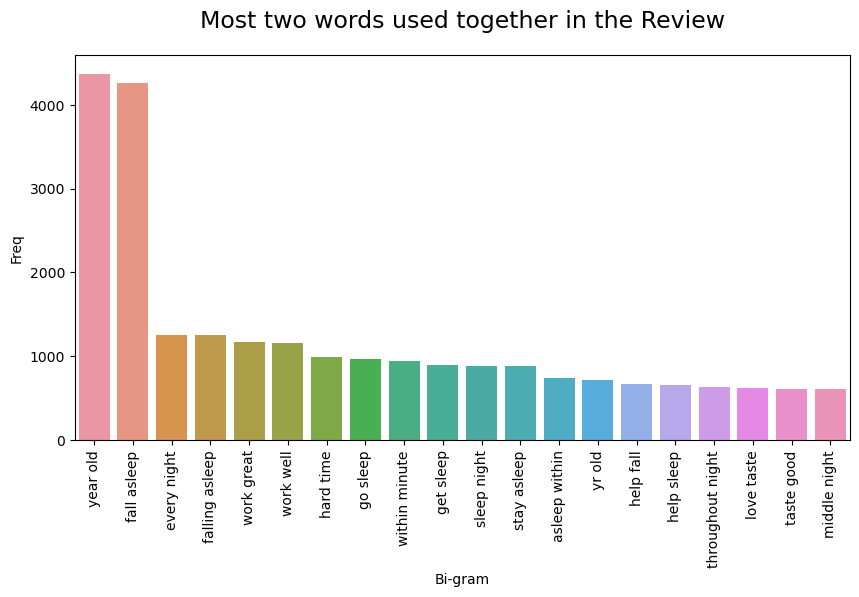

In [33]:
top20_bi_gram = top2_df.iloc[0:20,:]
fig = plt.figure(figsize = (10, 5))
plot=sns.barplot(x=top20_bi_gram["Bi-gram"],y=top20_bi_gram["Freq"])
plot.set_xticks(range(0, 20))
plot.set_xticklabels(rotation=90,labels = top20_bi_gram["Bi-gram"])
plt.title("Most two words used together in the Review", y=1.05, fontsize=17);

In [34]:
def top_n3_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(3,3), 
           max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]

In [35]:
top3_words = top_n3_words(final_df['CleanReview'], n=200)
top3_df = pd.DataFrame(top3_words)
top3_df.columns=["Tri-gram", "Freq"]

In [36]:
top3_df

,Tri-gram,Freq
0,help fall asleep,596
1,medium could loaded,454
2,year old son,392
3,time falling asleep,391
4,trouble falling asleep,348
...,...,...
195,take need sleep,72
196,hard time calming,72
197,child hard time,72
198,night highly recommend,71


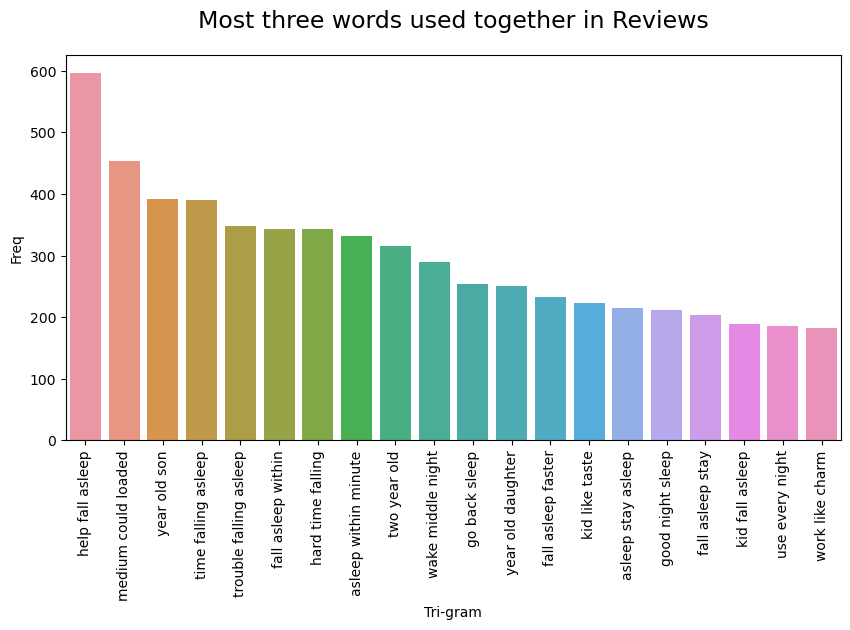

In [37]:
top20_tri_gram = top3_df.iloc[0:20,:]
fig = plt.figure(figsize = (10, 5))
plot=sns.barplot(x=top20_tri_gram["Tri-gram"],y=top20_tri_gram["Freq"])
plot.set_xticks(range(0, 20))
plot.set_xticklabels(rotation=90,labels = top20_tri_gram["Tri-gram"])
plt.title("Most three words used together in Reviews", y=1.05, fontsize=17);

### WordCloud for entire corpus

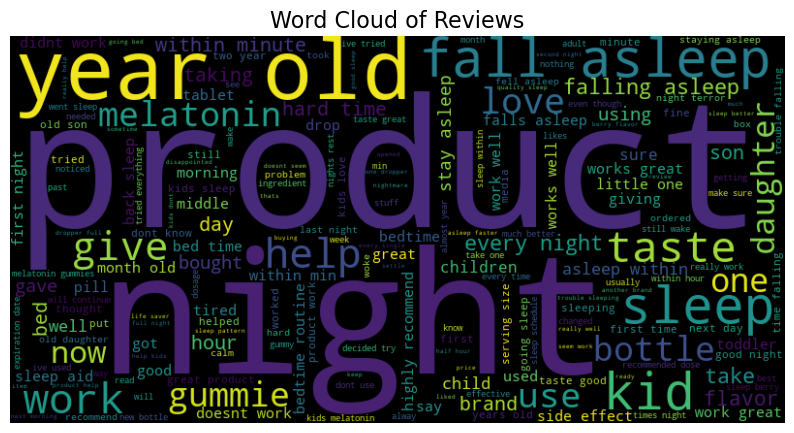

,Word,Frequency
13,sleep,16578
11,night,12773
18,work,9608
8,kid,8570
0,asleep,8365


In [38]:
# Simplify the cleaning process
def simple_clean_text(text):
    if not isinstance(text, str):
        return ""
    text = re.sub(r'[^a-zA-Z\s]', '', text.lower())  
    text = ' '.join([word for word in text.split() if len(word) > 2])
    return text

reviewContent['CleanedReview'] = reviewContent['ReviewContent'].apply(simple_clean_text)

vectorizer = CountVectorizer(max_features=20, stop_words='english')
X = vectorizer.fit_transform(final_df['CleanReview'])
word_freq = pd.DataFrame({
    'Word': vectorizer.get_feature_names_out(),
    'Frequency': X.toarray().sum(axis=0)
}).sort_values(by='Frequency', ascending=False)

wordcloud = WordCloud(width=800, height=400, background_color='black').generate(" ".join(reviewContent['CleanedReview']))

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Reviews", fontsize=16)
plt.show()

word_freq.head()


C:\Users\starb\AppData\Local\Temp\ipykernel_12832\3850033960.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['ReviewContent'] = final_df['ReviewContent'].fillna("").astype(str)
C:\Users\starb\AppData\Local\Temp\ipykernel_12832\3850033960.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['Polarity'] = final_df['ReviewContent'].apply(lambda x: TextBlob(x).sentiment.polarity)
C:\Users\starb\AppData\Local\Temp\ipykernel_12832\3850033960.py:5: SettingWithCopyWarning: 
A value is trying to

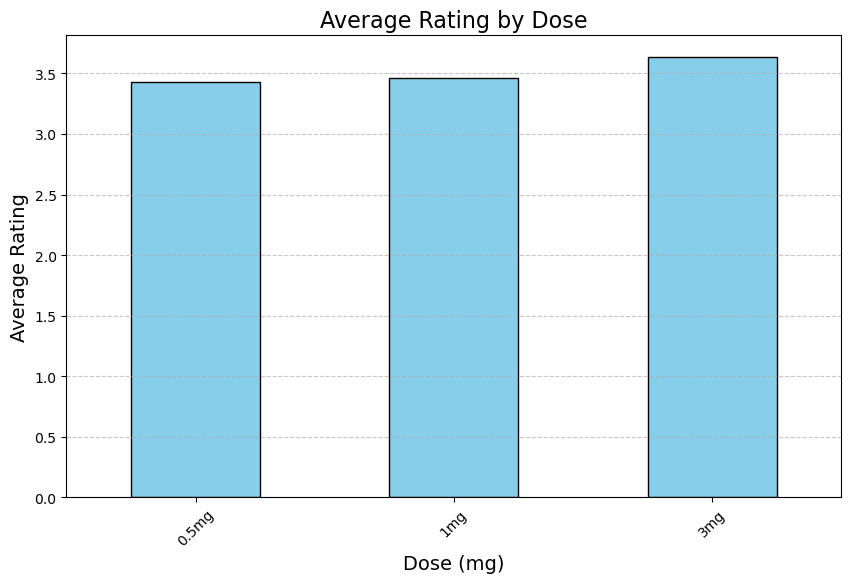

In [39]:
# Ensure all values in ReviewContent are strings
final_df['ReviewContent'] = final_df['ReviewContent'].fillna("").astype(str)

final_df['Polarity'] = final_df['ReviewContent'].apply(lambda x: TextBlob(x).sentiment.polarity)
final_df['Subjectivity'] = final_df['ReviewContent'].apply(lambda x: TextBlob(x).sentiment.subjectivity)

avg_rating_by_dose = final_df.groupby('Melatonin_MG')['ReviewScore'].mean()

plt.figure(figsize=(10, 6))
avg_rating_by_dose.sort_index().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Average Rating by Dose", fontsize=16)
plt.xlabel("Dose (mg)", fontsize=14)
plt.ylabel("Average Rating", fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [40]:
def getanalysis(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  elif score > 0:
      return 'Positive'

In [41]:
final_df['Analysis'] = final_df['Polarity'].apply(getanalysis) 
final_df  

C:\Users\starb\AppData\Local\Temp\ipykernel_12832\2698984093.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['Analysis'] = final_df['Polarity'].apply(getanalysis)


,Brand,ProductTitle,ReviewContent,ReviewDate,ReviewScore,Melatonin_MG,Form,Year,YearMonth,CleanReview,Polarity,Subjectivity,Analysis
0,JoySpring,JoySpring Melatonin 1MG for Kids | 5HTP for Ki...,"Being a mom of a 4 1/2 and two-year-old, I’ve ...",2024-10-06,5.0,1mg,Liquid,2024,2024-10,mom twoyearold ’ spent countless hour trying g...,0.233333,0.533333,Positive
1,JoySpring,JoySpring Melatonin 1MG for Kids | 5HTP for Ki...,"I want to start by saying, I read the good rev...",2024-05-10,5.0,1mg,Liquid,2024,2024-05,want start saying read good review first read ...,0.058835,0.449533,Positive
2,JoySpring,JoySpring Melatonin 1MG for Kids | 5HTP for Ki...,My child loves the taste and it helps her sleep.,2024-09-16,5.0,1mg,Liquid,2024,2024-09,child love taste help sleep,0.000000,0.000000,Neutral
3,JoySpring,JoySpring Melatonin 1MG for Kids | 5HTP for Ki...,I have been getting this product for years for...,2024-10-19,4.0,1mg,Liquid,2024,2024-10,getting year kid kid adhd used year ’ get calm...,0.012817,0.496786,Positive
4,JoySpring,JoySpring Melatonin 1MG for Kids | 5HTP for Ki...,My 2 year old always had a problem going to be...,2024-08-07,5.0,1mg,Liquid,2024,2024-08,year old always problem going bed anything lik...,0.077083,0.523148,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29506,Zarbee's,Zarbee's Kids Sleep Supplement Liquid with 1mg...,Made my 2 year old angry and miserable. And i...,2024-05-28,2.0,1mg,Liquid,2024,2024-05,made year old angry miserable ’ 2am still awak...,-0.350000,0.737500,Negative
29507,Zarbee's,Zarbee's Kids Sleep Supplement Liquid with 1mg...,I purchased this for a long lasting sleep for ...,2024-04-24,2.0,1mg,Liquid,2024,2024-04,purchased long lasting sleep child however kee...,0.066667,0.466667,Positive
29508,Zarbee's,Zarbee's Kids Sleep Supplement Liquid with 1mg...,Never going to buy this product again in life....,2024-04-23,1.0,1mg,Liquid,2024,2024-04,never going buy life gave great grandson he mo...,-0.034375,0.728125,Negative
29509,Zarbee's,Zarbee's Kids Sleep Supplement Liquid with 1mg...,It makes it worse. Don't buy it.,2024-01-22,1.0,1mg,Liquid,2024,2024-01,make worse dont buy,-0.400000,0.600000,Negative


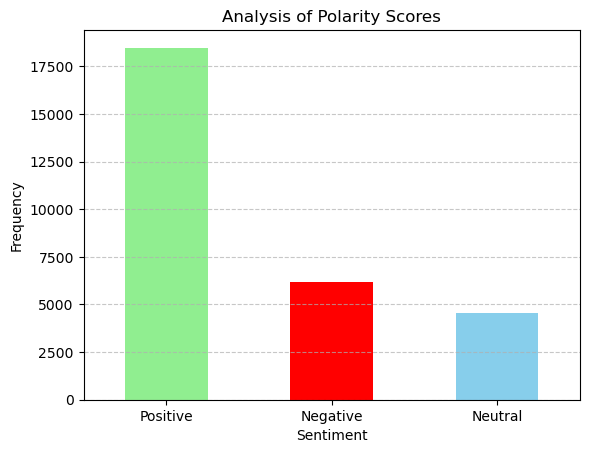

In [42]:

analysis_counts = final_df['Analysis'].value_counts()
analysis_counts.plot(kind='bar', color=['lightgreen', 'red', 'skyblue'])
plt.title('Analysis of Polarity Scores')
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.xticks(rotation=0)  
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

C:\Users\starb\AppData\Local\Temp\ipykernel_12832\3119829079.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['Melatonin_Timing'] = final_df['ReviewContent'].apply(extract_timing)


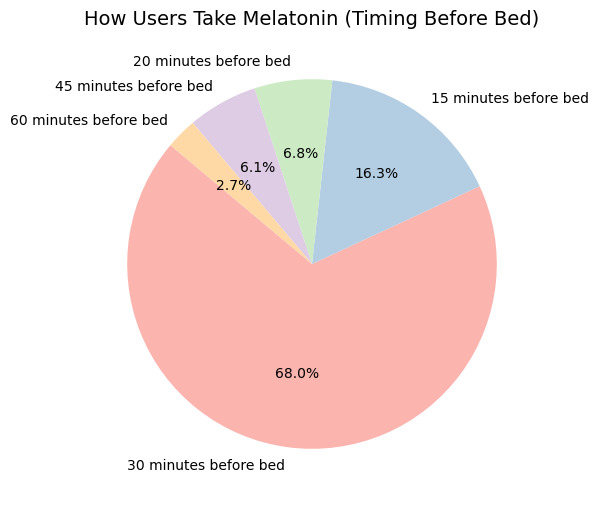

In [43]:
import re
import matplotlib.pyplot as plt

def extract_timing(text):
    patterns = [
        r'\d+\s*minutes\s*before\s*bed',
        r'\d+\s*hours\s*before\s*bed',
        r'just\s*before\s*bed',
        r'immediately\s*before\s*bed'
    ]
    text = str(text).lower() 
    for pattern in patterns:
        if match := re.search(pattern, text):
            return match.group(0)
    return "Other/Not Specified"

final_df['Melatonin_Timing'] = final_df['ReviewContent'].apply(extract_timing)
timing_counts = final_df['Melatonin_Timing'].value_counts()
timing_counts = timing_counts[timing_counts.index != "Other/Not Specified"]

plt.figure(figsize=(8, 6))
plt.pie(
    timing_counts,
    labels=timing_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=plt.cm.Pastel1(range(len(timing_counts))) 
)
plt.title("How Users Take Melatonin (Timing Before Bed)", fontsize=14)
plt.show()


C:\Users\starb\AppData\Local\Temp\ipykernel_12832\3514778326.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['YearMonth'] = final_df['ReviewDate'].dt.to_period('M')


    YearMonth  Polarity
0     2013-12  0.160013
1     2014-01 -0.043750
2     2014-02  0.086508
3     2014-08  0.147022
4     2014-09 -0.241667
..        ...       ...
120   2024-07  0.127182
121   2024-08  0.200633
122   2024-09  0.165520
123   2024-10  0.162943
124   2024-11  0.250235

[125 rows x 2 columns]


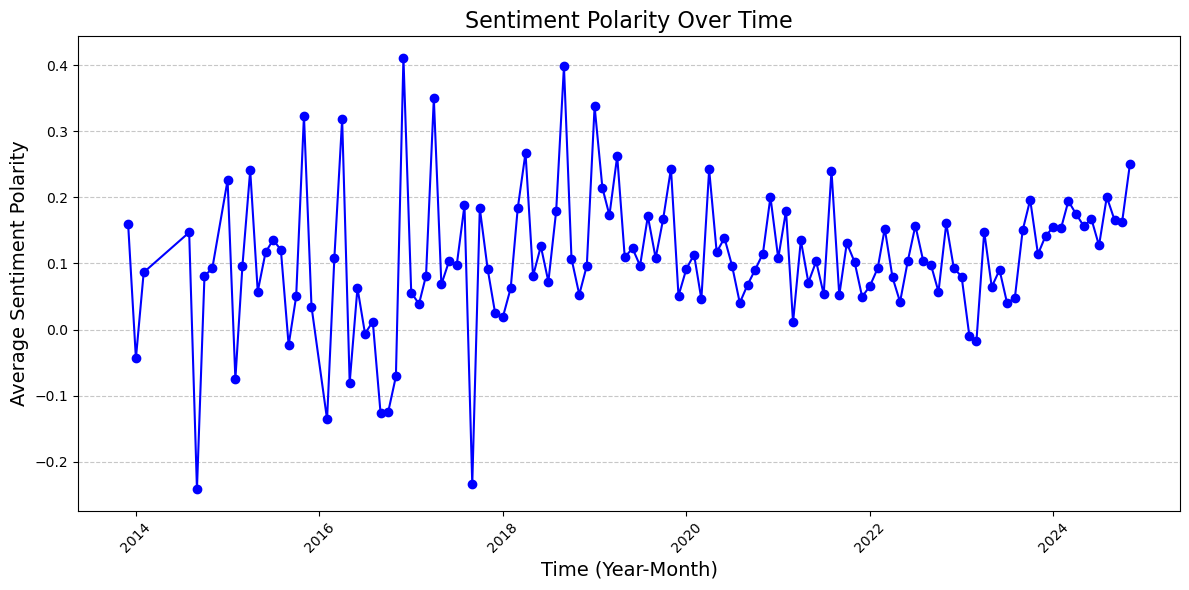

In [44]:
final_df['YearMonth'] = final_df['ReviewDate'].dt.to_period('M')


# Group by Year-Month and calculate average polarity
sentiment_over_time = final_df.groupby('YearMonth')['Polarity'].mean().reset_index()
print(sentiment_over_time)

sentiment_over_time['YearMonth'] = sentiment_over_time['YearMonth'].astype(str)
sentiment_over_time['YearMonth'] = pd.to_datetime(sentiment_over_time['YearMonth'])

plt.figure(figsize=(12, 6))
plt.plot(sentiment_over_time['YearMonth'], sentiment_over_time['Polarity'], marker='o', linestyle='-', color='blue')
plt.title('Sentiment Polarity Over Time', fontsize=16)
plt.xlabel('Time (Year-Month)', fontsize=14)
plt.ylabel('Average Sentiment Polarity', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

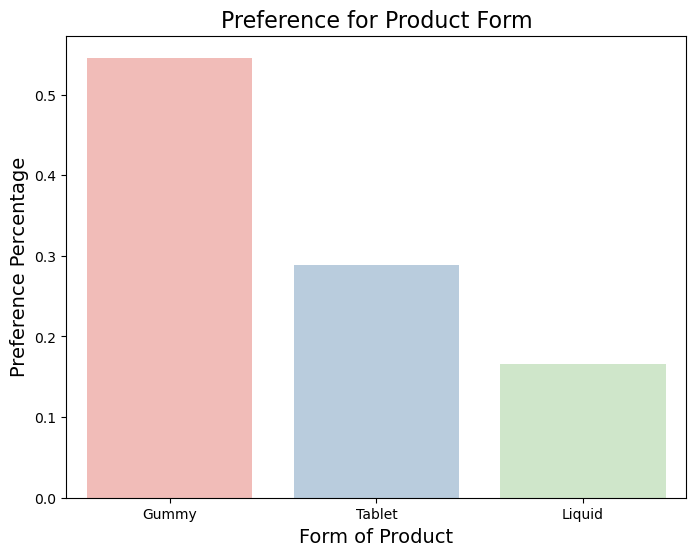

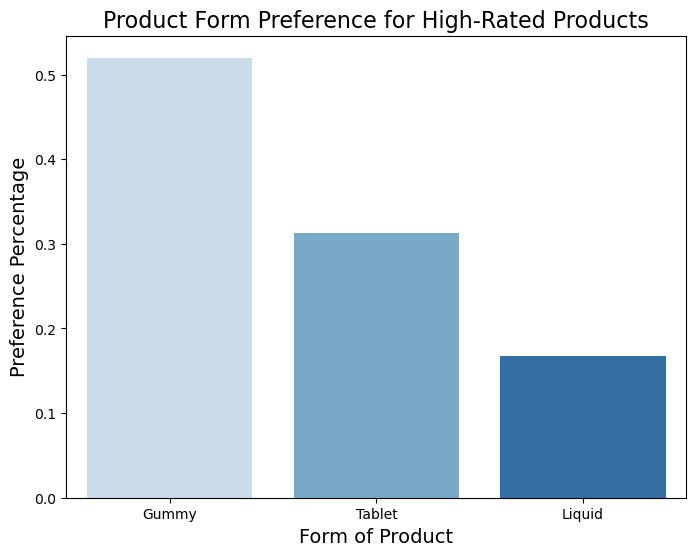

In [45]:
# **Which Forms are most preferred (Gummy, Tablet, Liquid)?**
preferred_form = final_df['Form'].value_counts(normalize=True).reset_index()
preferred_form.columns = ['Form', 'Preference Percentage']

plt.figure(figsize=(8, 6))
sns.barplot(x='Form', y='Preference Percentage', data=preferred_form, palette='Pastel1')
plt.title('Preference for Product Form', fontsize=16)
plt.xlabel('Form of Product', fontsize=14)
plt.ylabel('Preference Percentage', fontsize=14)
plt.show()

# **Which Review Scores are associated with high preferences?**
highly_rated_products = final_df[final_df['ReviewScore'] > 4]

preferred_form_high_rating = highly_rated_products['Form'].value_counts(normalize=True).reset_index()
preferred_form_high_rating.columns = ['Form', 'Preference Percentage']

plt.figure(figsize=(8, 6))
sns.barplot(x='Form', y='Preference Percentage', data=preferred_form_high_rating, palette='Blues')
plt.title('Product Form Preference for High-Rated Products', fontsize=16)
plt.xlabel('Form of Product', fontsize=14)
plt.ylabel('Preference Percentage', fontsize=14)
plt.show()

